# Project 1: Image Classification and Regression - LAURES Benoit

The file ``mp1.py`` must be in the same directory as this current Jupyter Notebook file.

For some reason, Tensorflow GPU doesn't work in Jupyter Notebook: I force it to use CPU. It that's not a problem for you, you may want to skip this cell.

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from mp1 import *  # File 'mp1.py' should be in the same folder, if not: this line may have to be modified.
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Conv2DTranspose
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


## Simple Classification and weights visualization

Let's generate training and testing datasets and one-hot encode it

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
[X_test, Y_test] = generate_dataset_classification(100, 20)

Creating data:
0
100
200
Creating data:
0


In [4]:
print(X_train.shape, Y_train.shape)

(300, 5184) (300,)


In [5]:
one_hot_encoder = OneHotEncoder(dtype=int)
Y_train_encoded = one_hot_encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_encoded = one_hot_encoder.fit_transform(Y_test.reshape(-1, 1)).toarray()

In [6]:
print(Y_train_encoded.shape)
print(Y_train_encoded[0])

(300, 3)
[1 0 0]


### Stochastic Gradient Descent

Create the model

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=5184))
model.add(Activation('softmax'))

First let's optimize it with stochastic gradient descent.

In [8]:
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0)

We'll follow the training with the accuracy metric.

In [9]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 0.6715 - acc: 0.6578
Epoch 2/30
300/300 [==============================] - 0s 113us/step - loss: 0.5827 - acc: 0.7133
Epoch 3/30
300/300 [==============================] - 0s 123us/step - loss: 0.5589 - acc: 0.7189
Epoch 4/30
300/300 [==============================] - 0s 123us/step - loss: 0.5378 - acc: 0.7356
Epoch 5/30
300/300 [==============================] - 0s 116us/step - loss: 0.5304 - acc: 0.7433
Epoch 6/30
300/300 [==============================] - 0s 133us/step - loss: 0.5019 - acc: 0.7567
Epoch 7/30
300/300 [==============================] - 0s 130us/step - loss: 0.4870 - acc: 0.7889
Epoch 8/30
300/300 [==============================] - 0s 163us/step - loss: 0.4703 - acc: 0.8078
Epoch 9/30
300/300 [==============================] - 0s 113us/step - loss: 0.4608 - acc: 0.7989
Epoch 10/30
300/300 [==============================] - 0s 130us/step - loss: 0.4454 - acc: 0.8089
Epoch 11/30
300/300 [==========

Let's now evaluate our network with a testing set.

In [11]:
loss, accuracy = model.evaluate(X_test, Y_test_encoded)
print("Accuracy on test set is : ", accuracy)

100/100 [==============================] - 0s 359us/step
Accuracy on test set is :  0.9066666865348816


The network outputs very nice predictions.
Let's now visualize the content of the layer.

In [12]:
weights, bias = model.get_weights()
print(weights.shape)

(5184, 3)


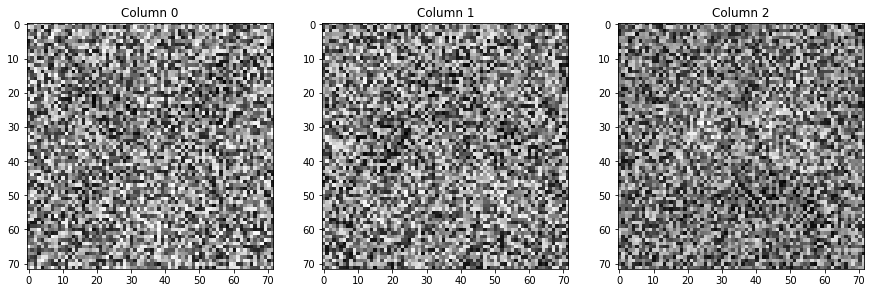

In [13]:
plt.figure(figsize=(15, 30))
plt.subplot(1, 3, 1)
plt.title("Column 0")
plt.imshow(weights[:, 0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Column 1")
plt.imshow(weights[:, 1].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Column 2")
plt.imshow(weights[:, 2].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

The columns are rather noisy, it's difficult to perceive anything.

### Adam optimizer
Let's do the same steps for the Adam optimizer

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=5184))
model.add(Activation('softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
300/300 [==============================] - 0s 592us/step - loss: 1.1839 - acc: 0.5622
Epoch 2/30
300/300 [==============================] - 0s 113us/step - loss: 0.6562 - acc: 0.6967
Epoch 3/30
300/300 [==============================] - 0s 130us/step - loss: 0.4298 - acc: 0.8100
Epoch 4/30
300/300 [==============================] - 0s 123us/step - loss: 0.3579 - acc: 0.8333
Epoch 5/30
300/300 [==============================] - 0s 126us/step - loss: 0.3019 - acc: 0.8456
Epoch 6/30
300/300 [==============================] - 0s 130us/step - loss: 0.2212 - acc: 0.9222
Epoch 7/30
300/300 [==============================] - 0s 136us/step - loss: 0.1754 - acc: 0.9744
Epoch 8/30
300/300 [==============================] - 0s 140us/step - loss: 0.1574 - acc: 0.9844
Epoch 9/30
300/300 [==============================] - 0s 123us/step - loss: 0.1396 - acc: 0.9856
Epoch 10/30
300/300 [==============================] - 0s 126us/step - loss: 0.1215 - acc: 0.9900
Epoch 11/30
300/300 [========

We can note that the training is much faster.

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test_encoded)
print("Accuracy on test set is : ", accuracy)

100/100 [==============================] - 0s 379us/step
Accuracy on test set is :  0.9966666793823242


This model is even better trained than the previous one. Let's check the weights.

In [17]:
weights, bias = model.get_weights()
print(weights.shape)

(5184, 3)


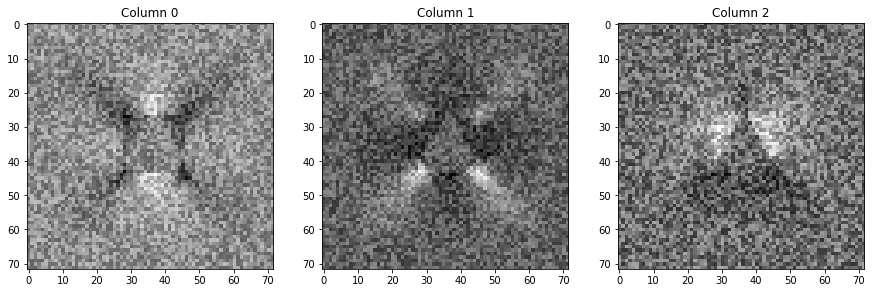

In [18]:
plt.figure(figsize=(15, 30))
plt.subplot(1, 3, 1)
plt.title("Column 0")
plt.imshow(weights[:, 0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Column 1")
plt.imshow(weights[:, 1].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Column 2")
plt.imshow(weights[:, 2].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

This time, the columns are rather meaningful: we can clearly see each form we want to classify (square, circle, triangle).

## A More Difficult Classification Problem

Let's generate training and testing datasets and one-hot encode it (we'll use more data than in the previous part because it's more complex).

In [19]:
[X_train, Y_train] = generate_dataset_classification(600, 20, True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200
300
400
500
Creating data:
0
100
200


In [20]:
one_hot_encoder = OneHotEncoder(dtype=int)
Y_train_encoded = one_hot_encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
print(Y_train_encoded.shape)
print(Y_test.shape)

(600, 3)
(300, 3)


### Linear classifier

Let's rebuild the linear classifier with Adam optimizer as it gave the best results.

In [21]:
model = Sequential()
model.add(Dense(3, input_dim=5184))
model.add(Activation('softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
600/600 [==============================] - 0s 381us/step - loss: 1.3547 - acc: 0.5467
Epoch 2/30
600/600 [==============================] - 0s 120us/step - loss: 0.7881 - acc: 0.5933
Epoch 3/30
600/600 [==============================] - 0s 105us/step - loss: 0.6080 - acc: 0.6767
Epoch 4/30
600/600 [==============================] - 0s 113us/step - loss: 0.6048 - acc: 0.6756
Epoch 5/30
600/600 [==============================] - 0s 111us/step - loss: 0.5788 - acc: 0.7067
Epoch 6/30
600/600 [==============================] - 0s 116us/step - loss: 0.5505 - acc: 0.7128
Epoch 7/30
600/600 [==============================] - 0s 118us/step - loss: 0.5523 - acc: 0.7067
Epoch 8/30
600/600 [==============================] - 0s 111us/step - loss: 0.5236 - acc: 0.7267
Epoch 9/30
600/600 [==============================] - 0s 118us/step - loss: 0.5520 - acc: 0.7378
Epoch 10/30
600/600 [==============================] - 0s 113us/step - loss: 0.5433 - acc: 0.7183
Epoch 11/30
600/600 [========

We can already note that the training is not as good as in the previous part because the accuracy on the training set is lower: the data is indeed more complex.


Let's try on the testing set.

In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Accuracy on test set is : ", accuracy)

300/300 [==============================] - 0s 213us/step
Accuracy on test set is :  0.7522222224871318


Indeed, accuracy on the testing set is much lower (about 70%) than previously (it was about 100%). Let's check the content of the weights.

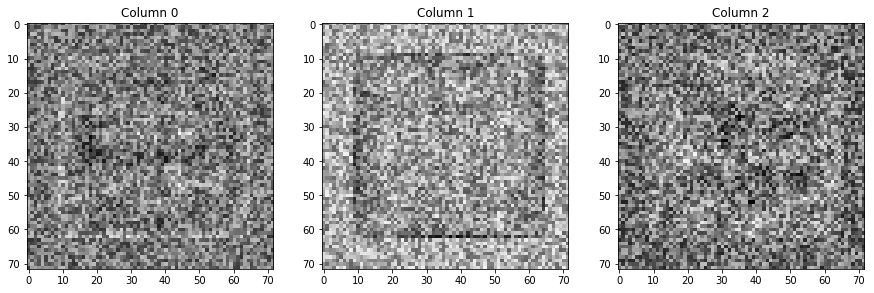

In [24]:
weights, bias = model.get_weights()

plt.figure(figsize=(15, 30))
plt.subplot(1, 3, 1)
plt.title("Column 0")
plt.imshow(weights[:, 0].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Column 1")
plt.imshow(weights[:, 1].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Column 2")
plt.imshow(weights[:, 2].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

As expected, the linear classifier didn't manage to properly learn the shapes of the data and the vizualisations of the weights are very blurry.

### Small CNN

First, let's change the shape of data so that one example is a square matrix (72 x 72) and not a flat vector (of size 5184 x 1).

In [25]:
print("Before : ", X_train.shape)
X_train = X_train.reshape(-1, 72, 72, 1)
X_test = X_test.reshape(-1, 72, 72, 1)
print("After : ", X_train.shape)

Before :  (600, 5184)
After :  (600, 72, 72, 1)


Let's build a small CNN to compare the results.

In [26]:
model = Sequential()
model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train_encoded, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.0223 - acc: 0.6056
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.5784 - acc: 0.6933
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.5262 - acc: 0.7467
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4755 - acc: 0.7833
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4312 - acc: 0.8211
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.4018 - acc: 0.8411
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3753 - acc: 0.8572
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3609 - acc: 0.8661
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3237 - acc: 0.8911
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3104 - acc: 0.8889
Epoch 11/30
600/600 [============================

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss on test set is : ", loss)
print("Accuracy on test set is : ", accuracy)

300/300 [==============================] - 0s 1ms/step
Loss on test set is :  0.2935585641860962
Accuracy on test set is :  0.8800000127156575


The accuracy is much better with this small CNN than with the linear classifier. However, the testing loss is greater than training loss so there's a bit of overfitting here. We thus could add a dropout layer to deal with it.

## A Regression Problem

First let's check the data.

In [29]:
[X_train, Y_train] = generate_dataset_regression(800, 20)
[X_test, Y_test] = generate_test_set_regression()


Creating data:
0
100
200
300
400
500
600
700
Creating data:
0
100
200


In [30]:
def orden_vertices_coordinates(Y):
    """Ordens the coordinates of the vertices by increasing abscissa."""
    if len(Y.shape) != 2:
        return Y
    Y_ordered = Y.copy()
    for i in range(Y.shape[0]):
        order = 2*np.argsort([Y[i, 0], Y[i, 2], Y[i, 4]])
        Y_ordered[i, :] = [Y[i, order[0]], Y[i, order[0] + 1], Y[i, order[1]], Y[i, order[1] + 1], Y[i, order[2]], Y[i, order[2] + 1]]
    return Y_ordered

(800, 5184) (800, 6)
(300, 5184) (300, 6)


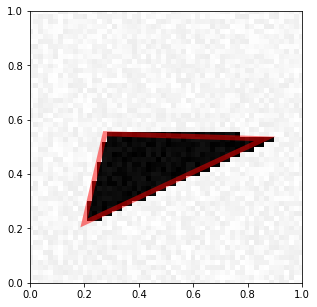

In [31]:
X_train_reshaped = X_train.reshape(-1, 72, 72, 1)
X_test_reshaped = X_test.reshape(-1, 72, 72, 1)

Y_train = orden_vertices_coordinates(Y_train)
Y_test = orden_vertices_coordinates(Y_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
visualize_prediction(X_train[0], Y_train[0])

Let's now build a regressor (2 Conv layers + 1 Fully-connected, with dropout and batch normalization) with the mean squared error as loss function.

In [32]:
model = Sequential()
# model.add(BatchNormalization(input_shape=(72, 72, 1)))
model.add(Conv2D(8, (3, 3), strides=(1, 1), activation='relu', input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3, 3), strides=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))

model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))

model.add(Conv2D(64, (3, 3), strides=(2, 2), activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))

model.add(Flatten())
# model.add(Dense(2048, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, decay=0)
model.compile(optimizer=adam, loss='mean_squared_error')

In [33]:
model.fit(X_train_reshaped, Y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.1)

Train on 720 samples, validate on 80 samples
Epoch 1/30
720/720 [==============================] - 9s 13ms/step - loss: 0.0516 - val_loss: 0.0519
Epoch 2/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0365 - val_loss: 0.0495
Epoch 3/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0336 - val_loss: 0.0428
Epoch 4/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0291 - val_loss: 0.0420
Epoch 5/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0261 - val_loss: 0.0402
Epoch 6/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0241 - val_loss: 0.0414
Epoch 7/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0219 - val_loss: 0.0360
Epoch 8/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0203 - val_loss: 0.0362
Epoch 9/30
720/720 [==============================] - 9s 12ms/step - loss: 0.0193 - val_loss: 0.0321
Epoch 10/30
720/720 [=========================

In [34]:
print("Loss on training set is : ", model.evaluate(X_train_reshaped, Y_train))
print("Loss on test set is : ", model.evaluate(X_test_reshaped, Y_test))

800/800 [==============================] - 3s 3ms/step
Loss on training set is :  0.008239451944828034
300/300 [==============================] - 1s 3ms/step
Loss on test set is :  0.014939826304713884


I struggled to have the network learn something without too much overfitting.

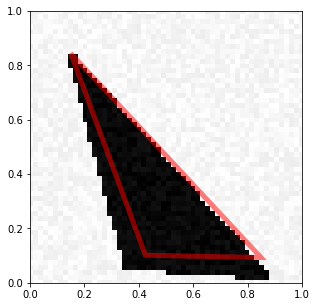

In [35]:
i = np.random.randint(300)
visualize_prediction(X_test[i], model.predict(X_test_reshaped[i].reshape(1, 72, 72, 1)))

## Image Denoising

First, let's generate the data. The functions used in the following cells are implemented in my modified version of `mp1.py`: see [dataset generation](https://github.com/BenoitLaures/MSc_DL_projects/blob/master/project_1/mp1.py#L159), [test set generation](https://github.com/BenoitLaures/MSc_DL_projects/blob/master/project_1/mp1.py#L182) and [the visualisation function](https://github.com/BenoitLaures/MSc_DL_projects/blob/master/project_1/mp1.py#L186).

Creating data:
0
100
200
300
400
500
600
700
800
900
Creating data:
0
100
200
(1000, 72, 72, 1) (1000, 72, 72, 1)


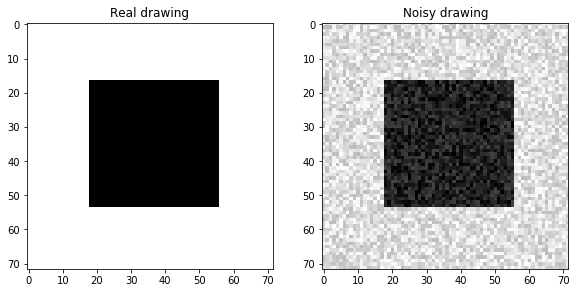

In [36]:
X_train, X_train_noisy = generate_dataset_denoising(1000)
X_test, X_test_noisy = generate_test_set_denoising()
print(X_train.shape, X_train_noisy.shape)
visualize_denoising(X_train_noisy[0], X_train[0])

Now let's build a hourglass network for denoising : 2 Conv layers (stride 2) + 1 Conv layer (stride 1) + 2 TransposedConv layers (stride 2), all with 'ReLu' activation function except last which has 'Sigmoid'.

In [37]:
model = Sequential()
model.add(Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(72, 72, 1), padding='same'))
model.add(Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu', padding='same'))

model.add(Conv2DTranspose(8, (3, 3), strides=(2, 2), activation='relu', padding='same'))
model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), activation='sigmoid', padding='same'))

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy')

In [38]:
model.fit(X_train, X_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 2s 2ms/step - loss: 0.6621 - val_loss: 0.5521
Epoch 2/20
900/900 [==============================] - 1s 1ms/step - loss: 0.3863 - val_loss: 0.2151
Epoch 3/20
900/900 [==============================] - 1s 1ms/step - loss: 0.1155 - val_loss: 0.0452
Epoch 4/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0325 - val_loss: 0.0238
Epoch 5/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0214 - val_loss: 0.0180
Epoch 6/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0167 - val_loss: 0.0145
Epoch 7/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0137 - val_loss: 0.0121
Epoch 8/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 9/20
900/900 [==============================] - 1s 1ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 10/20
900/900 [==============================] -

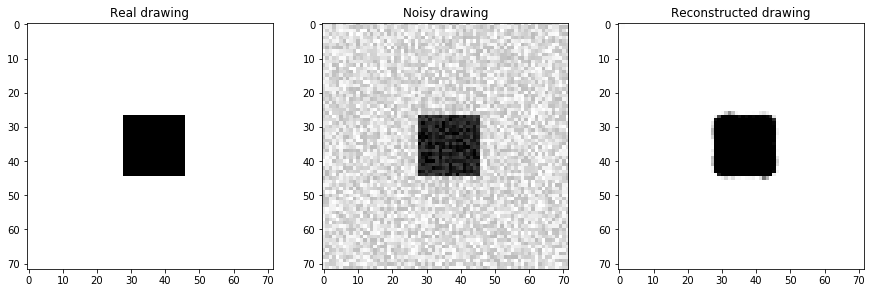

In [44]:
i = np.random.randint(300)
visualize_denoising(X_test_noisy[i], X_test[i], model.predict(X_test[i].reshape(1, 72, 72, 1)))

The network reconstructs remarkably well the drawing without any noise !